# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Julia

Last Name: Stelman

Student ID: 912211657

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox    
import shapely.geometry as geom

In [2]:
import sqlite3 as sql
import pandas as pd

In [3]:
db = sql.connect('sf_data.sqlite')

In [4]:
qq = """
SELECT DISTINCT A.Applicant AS Vendor, B.locationid AS Location
FROM mobile_food_schedule AS B LEFT JOIN mobile_food_permits AS A
ON A.permit = B.permit
"""
print(pd.read_sql(qq,db).shape)
tab1 = pd.read_sql(qq,db)

(679, 2)


In [5]:
VendorsQ = tab1.Vendor.unique()
VQ = list(VendorsQ)
VC = []
list(tab1.Vendor)
for vendor in VendorsQ:
    VC.append(list(tab1.Vendor).count(vendor))

counts = pd.DataFrame(list(zip(VQ,VC)))
counts.columns = ["vendor","num_locations"]
counts[counts.num_locations == counts.num_locations.max()]

,vendor,num_locations
124,May Catering,58


May Catering sells at the most locations (58 locations in total).

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

1. **What crimes are most common around schools?**

2. **What types of crimes happen near open areas (parking lot and parks)?**

3. **What can we infer from the data about food vendor hours base on location? (if near a school, maybe earlier, if near noise complaint hotspot, maybe more late)**

4. **What areas have the widest varieties of food vendors coming in?**

5. **What parts of the city have the most and the least noise complaints and how does that measure up to crime rate?**

6. Do the vendors that sell near schools seem to target students as customers?

In [6]:
sanfran = gpd.read_file("sfshapes/geo_export_80d33581-e8e7-45b5-9857-85c5ad2f2777.shp")
sanfran.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,None,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,None,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [7]:
noise = pd.read_sql("SELECT * FROM noise ",db)
noise = noise[noise.Neighborhood==noise.Neighborhood]
noise.Neighborhood = [x.replace(r"'",'') for x in noise.Neighborhood]
lnglat = 0
lnglat = [geom.Point(x) for x in zip(noise.Lon, noise.Lat)]
noise = gpd.GeoDataFrame(noise, geometry = lnglat)
noise.head()

,CaseID,Type,Address,Neighborhood,Datetime,Lat,Lon,geometry
1,6446138,amplified_sound_electronics,Intersection of CLINTON PARK and GUERRERO ST,Mission Dolores,2016-10-21 13:20:18,37.769148,-122.424475,POINT (-122.424474850717 37.7691482064722)
2,5929789,other_excessive_noise,"1301 48TH AVE, SAN FRANCISCO, CA, 94122",Outer Sunset,2016-06-01 11:38:59,37.762047,-122.508365,POINT (-122.508365256702 37.762047023755)
3,5659943,other_excessive_noise,"736 LEAVENWORTH ST, SAN FRANCISCO, CA, 94109",Lower Nob Hill,2016-03-13 01:18:27,37.787983,-122.414943,POINT (-122.414943216196 37.787982901643)
4,5930704,other_excessive_noise,"1360 43RD AVE, SAN FRANCISCO, CA, 94122",Outer Sunset,2016-06-01 13:58:43,37.761385,-122.502232,POINT (-122.502232253358 37.76138549134)
5,6427526,construction_private_property,"108 VIRGINIA AVE, SAN FRANCISCO, CA, 94110",Bernal Heights,2016-10-17 07:28:37,37.742435,-122.420087,POINT (-122.420087435923 37.742435250569)


In [9]:
joind = gpd.sjoin(noise, sanfran, how = "inner", op = "within")
joined = joind.drop(['link','index_right'],axis=1)

In [31]:
crime = pd.read_sql("SELECT Category, Descript AS Desc, DayOfWeek, Datetime, PdDistrict, Lon, Lat FROM crime ",db)
lnglat = 0
lnglat = [geom.Point(x) for x in zip(crime.Lon, crime.Lat)]
crime = gpd.GeoDataFrame(crime, geometry = lnglat)
crime.head()
joind1 = gpd.sjoin(crime, sanfran, how = "inner", op = "within")
joined1crime = joind1.drop(['link','index_right'],axis=1)
joined1crime.head(3)

,Category,Desc,DayOfWeek,Datetime,PdDistrict,Lon,Lat,geometry,name
0,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,-122.421582,37.761701,POINT (-122.42158168137 37.7617007179518),Mission Dolores
89,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,Sunday,2015-02-01 20:00:00,MISSION,-122.430495,37.764342,POINT (-122.430494795393 37.76434185816321),Mission Dolores
90,ASSAULT,THREATENING SCHOOL OR PUBLIC EMPLOYEE,Sunday,2015-02-01 20:00:00,MISSION,-122.430495,37.764342,POINT (-122.430494795393 37.76434185816321),Mission Dolores


In [26]:
def goodgrief(x,name,num):
    y = 'a'
    for char in name.iloc[x,num]:
        if char in ('.:;/-&!?,('):
            name.iloc[x,num] = y[1:]
            break
        y = y+char

,Vendor,fi,ft,lat,lng,School,type,Day,start,end,geometry
118,"San Francisco Street Foods, Inc.",hot dogs,Push Cart,37.784,-122.401,South Of Market Child Care - Yerba Buena Garde...,Independent / Private,Sa,6,12,POINT (-122.401 37.784)
119,"San Francisco Street Foods, Inc.",hot dogs,Push Cart,37.784,-122.401,South Of Market Child Care - Yerba Buena Garde...,Independent / Private,Su,6,12,POINT (-122.401 37.784)
120,"San Francisco Street Foods, Inc.",hot dogs,Push Cart,37.784,-122.401,South Of Market Child Care - Yerba Buena Garde...,Independent / Private,Th,6,12,POINT (-122.401 37.784)
121,"San Francisco Street Foods, Inc.",hot dogs,Push Cart,37.784,-122.401,South Of Market Child Care - Yerba Buena Garde...,Independent / Private,Tu,6,12,POINT (-122.401 37.784)
122,"San Francisco Street Foods, Inc.",hot dogs,Push Cart,37.784,-122.401,South Of Market Child Care - Yerba Buena Garde...,Independent / Private,We,6,12,POINT (-122.401 37.784)
123,May Catering,cold truck,Truck,37.753,-122.407,Valdivia Family Day Care,Independent / Private,Fr,9,10,POINT (-122.407 37.753)
124,May Catering,cold truck,Truck,37.753,-122.407,Valdivia Family Day Care,Independent / Private,Mo,9,10,POINT (-122.407 37.753)
125,May Catering,cold truck,Truck,37.753,-122.407,Valdivia Family Day Care,Independent / Private,Th,9,10,POINT (-122.407 37.753)
126,May Catering,cold truck,Truck,37.753,-122.407,Valdivia Family Day Care,Independent / Private,Tu,9,10,POINT (-122.407 37.753)
127,May Catering,cold truck,Truck,37.753,-122.407,Valdivia Family Day Care,Independent / Private,We,9,10,POINT (-122.407 37.753)


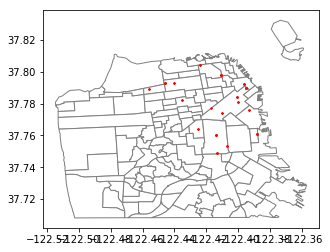

In [36]:
q1 = """
SELECT DISTINCT A.Applicant AS Vendor, FoodItems AS fi, 
A.FacilityType AS ft, ROUND(C.latitude,3) AS lat,
ROUND(C.longitude,3) AS lng, D.Name AS School,
D.Category AS type, B.DayOfWeek AS Day,
B.StartHour AS start, B.EndHour AS end
FROM schools AS D INNER JOIN mobile_food_locations AS C INNER JOIN mobile_food_permits AS A INNER JOIN mobile_food_schedule AS B
ON A.permit = B.permit AND B.locationid = C.locationid AND ROUND(C.latitude,3) = ROUND(D.Lat,3) AND ROUND(C.longitude,3) = ROUND(D.Lon,3) 
"""
tab = pd.read_sql(q1,db)
tab = tab.loc[tab.lat!=0]
tab = tab.loc[tab.lng!=0]
lnglat = [geom.Point(x) for x in zip(tab.lng, tab.lat)]
tab.index = pd.Series(range(len(tab.index)))
tab.fi = tab.fi.str.lower()
pd.Series(range(len(list(tab.fi)))).apply(lambda x: goodgrief(x,name = tab, num = 1))

tab = gpd.GeoDataFrame(tab, geometry = lnglat)
ax = sanfran.plot(color = "white", edgecolor = "gray")
tab.plot(ax = ax, marker='o', color='red', markersize=1)
tab.head(130).tail(10)

,Vendor,fi,ft,lat,lng,School,type,Day,start,end,geometry
0,D & T Catering,cold truck,Truck,37.8038,-122.4241,Galileo High School,USD Grades 9-12,Fr,0,13,POINT (-122.4241 37.8038)
1,D & T Catering,cold truck,Truck,37.8038,-122.4241,Galileo High School,USD Grades 9-12,Mo,0,13,POINT (-122.4241 37.8038)
2,D & T Catering,cold truck,Truck,37.8038,-122.4241,Galileo High School,USD Grades 9-12,Th,0,13,POINT (-122.4241 37.8038)
3,D & T Catering,cold truck,Truck,37.8038,-122.4241,Galileo High School,USD Grades 9-12,Tu,0,13,POINT (-122.4241 37.8038)
4,D & T Catering,cold truck,Truck,37.8038,-122.4241,Galileo High School,USD Grades 9-12,We,0,13,POINT (-122.4241 37.8038)
5,Natan's Catering,burgers,Truck,37.7612,-122.3881,Alt School - Dogpatch 1,Independent / Private,Mo,9,1,POINT (-122.3881 37.7612)
6,Natan's Catering,burgers,Truck,37.7612,-122.3881,Alt School - Dogpatch 1,Independent / Private,Mo,6,7,POINT (-122.3881 37.7612)
7,Natan's Catering,burgers,Truck,37.7612,-122.3881,Alt School - Dogpatch 1,Independent / Private,Mo,8,9,POINT (-122.3881 37.7612)
8,Natan's Catering,burgers,Truck,37.7612,-122.3881,Alt School - Dogpatch 1,Independent / Private,Sa,12,1,POINT (-122.3881 37.7612)
9,Natan's Catering,burgers,Truck,37.7612,-122.3881,Alt School - Dogpatch 1,Independent / Private,Su,9,10,POINT (-122.3881 37.7612)


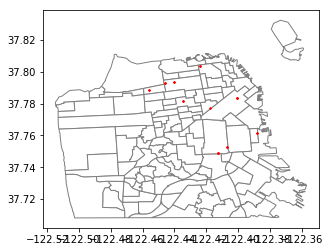

In [32]:
q2 = """
SELECT DISTINCT A.Applicant AS Vendor, FoodItems AS fi, 
A.FacilityType AS ft, ROUND(C.latitude,4) AS lat,
ROUND(C.longitude,4) AS lng, D.Name AS School,
D.Category AS type, B.DayOfWeek AS Day,
B.StartHour AS start, B.EndHour AS end
FROM schools AS D INNER JOIN mobile_food_locations AS C INNER JOIN mobile_food_permits AS A INNER JOIN mobile_food_schedule AS B
ON A.permit = B.permit AND B.locationid = C.locationid AND ROUND(C.latitude,4) = ROUND(D.Lat,4) AND ROUND(C.longitude,4) = ROUND(D.Lon,4) 
"""
tab = pd.read_sql(q2,db)
tab = tab.loc[tab.lat!=0]
tab = tab.loc[tab.lng!=0]
lnglat = [geom.Point(x) for x in zip(tab.lng, tab.lat)]
tab.index = pd.Series(range(len(tab.index)))
tab.fi = tab.fi.str.lower()
pd.Series(range(len(list(tab.fi)))).apply(lambda x: goodgrief(x,name = tab, num = 1))

tab = gpd.GeoDataFrame(tab, geometry = lnglat)
ax = sanfran.plot(color = "white", edgecolor = "gray")
tab.plot(ax = ax, marker='o', color='red', markersize=1)
tab.head(100)

In [30]:
f = pd.read_sql("SELECT DISTINCT Applicant, lower(FoodItems) AS FoodItems, FacilityType FROM mobile_food_permits",db)
f = f.dropna(axis = 0,how='any')
f.index = pd.Series(range(len(f.index)))
pd.Series(range(len(list(f.FoodItems)))).apply(lambda x: goodgrief(x=x, name = f, num = 1))
f.FoodItems = f.FoodItems.str.lower()

In [374]:
x = pd.read_sql("SELECT Distinct * FROM noise",db)
noise3 = x.loc[x.Neighborhood == "Westwood Park"]

In [105]:
q1 = """
SELECT DISTINCT A.Applicant AS Vendor, B.locationid AS Location
FROM mobile_food_schedule AS B LEFT JOIN mobile_food_permits AS A
ON A.permit = B.permit
"""
print(pd.read_sql(qq,db).shape)
tab1 = pd.read_sql(qq,db)
tab1.head()

(679, 2)


,Vendor,Location
0,Bombay Blvd.,305727
1,Bombay Blvd.,305735
2,Sausage Slinger,321365
3,"Halal Cart, LLC",334914
4,Bacon Bacon,338539


In [106]:
q = """
SELECT A.Applicant AS Vendor, B.locationid AS Location, C.latitude AS lat, C.longitude AS lng
FROM mobile_food_locations AS C LEFT JOIN mobile_food_permits AS A LEFT JOIN mobile_food_schedule AS B
ON A.permit = B.permit AND B.locationid = C.locationid
"""
food = pd.read_sql(q,db)
food = food.loc[food.lng!=0]
food.head(2)

,Vendor,Location,lat,lng
0,F & C Catering,762182.0,37.774871,-122.398532
1,F & C Catering,762182.0,37.774871,-122.398532


In [306]:
specials = list(sanfran.name)
for i in list(hoods.Neighborhood.unique()):
    specials.remove(i) 

print(specials)

['Yerba Buena Island', 'Mt. Davidson Manor', 'Monterey Heights', 'McLaren Park', 'Apparel City', 'Forest Knolls']


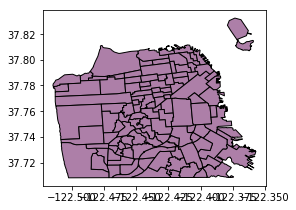

In [81]:
sfplot = sanfran.plot(figsize = (4, 4), edgecolor = "black", color = "#ad7fa8")

In [119]:
lnglat = [geom.Point(x) for x in zip(food.lng, food.lat)]
food = gpd.GeoDataFrame(food, geometry = lnglat)
food.head()

,Vendor,Location,lat,lng,geometry
0,F & C Catering,762182.0,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
1,F & C Catering,762182.0,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
2,F & C Catering,762182.0,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
3,F & C Catering,762182.0,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)
4,F & C Catering,762182.0,37.774871,-122.398532,POINT (-122.398531708276 37.7748713162388)


In [312]:
noise = hoods.copy().loc[hoods.Lon!=0]
nll = [geom.Point(x) for x in zip(noise.Lon, noise.Lat)]
noise = gpd.GeoDataFrame(noise,geometry = nll)
noise.head(2)

,CaseID,Type,Address,Neighborhood,Datetime,Lat,Lon,geometry
1,6446138,amplified_sound_electronics,Intersection of CLINTON PARK and GUERRERO ST,Mission Dolores,2016-10-21 13:20:18,37.769148,-122.424475,POINT (-122.424474850717 37.7691482064722)
2,5929789,other_excessive_noise,"1301 48TH AVE, SAN FRANCISCO, CA, 94122",Outer Sunset,2016-06-01 11:38:59,37.762047,-122.508365,POINT (-122.508365256702 37.762047023755)


In [375]:
noise2 = noise2.loc[noise2.Lon!=0]
n2ll = [geom.Point(x) for x in zip(noise2.Lon, noise2.Lat)]
noise2 = gpd.GeoDataFrame(noise2,geometry = n2ll)

#noise3 = noise3.loc[noise3.Lon!=0]
n3ll = [geom.Point(x) for x in zip(noise3.Lon, noise3.Lat)]
noise3 = gpd.GeoDataFrame(noise3,geometry = n3ll)
noise3.head()

,CaseID,Type,Address,Neighborhood,Datetime,Lat,Lon,geometry
298,6466822,construction_public,Intersection of PLYMOUTH AVE and WILDWOOD WAY,Westwood Park,2016-10-27 10:17:37,37.727590,-122.456537,POINT (-122.456536920057 37.727590005529)
608,5512108,mechanical_equipment,"1540 OCEAN AVE, SAN FRANCISCO, CA, 94112",Westwood Park,2016-01-28 11:19:17,37.724597,-122.458917,POINT (-122.458917122021 37.724596902838)
959,5760506,garbage_recycling_collection,"425 MIRAMAR AVE, SAN FRANCISCO, CA, 94112",Westwood Park,2016-04-13 16:18:35,37.725431,-122.458352,POINT (-122.458352358855 37.725430811577)
1451,6166346,other_excessive_noise,"55 SOUTHWOOD DR, SAN FRANCISCO, CA, 94112",Westwood Park,2016-08-07 02:08:08,37.725061,-122.457560,POINT (-122.457559575404 37.725060978411)
1684,6229781,mechanical_equipment,"1728 OCEAN AVE, SAN FRANCISCO, CA, 94112",Westwood Park,2016-08-23 17:02:39,37.725354,-122.460708,POINT (-122.460707922086 37.725354174804)


None
{'init': 'epsg:4326'}


,CaseID,Type,Address,Neighborhood,Datetime,Lat,Lon,geometry,index_right,link,name
1684,6229781,mechanical_equipment,"1728 OCEAN AVE, SAN FRANCISCO, CA, 94112",Westwood Park,2016-08-23 17:02:39,37.725354,-122.460708,POINT (-122.460707922086 37.725354174804),64,http://en.wikipedia.org/wiki/Mount_Davidson_(C...,Mt. Davidson Manor


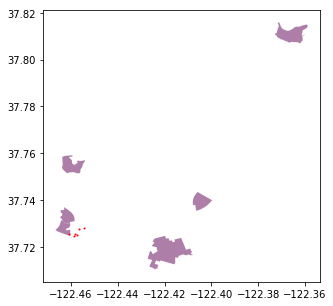

In [419]:
sfnoise = sanfran[sanfran.name.isin(specials)]
sfn = sfnoise.plot(figsize = (5, 5), color = "#ad7fa8")
#sfplot = sanfran.plot(figsize = (30, 30), edgecolor = "black", color = "#ad7fa8")
noise3plot = noise3.plot(ax = sfn, marker = 'o',color = 'red', markersize =1)


joined = gpd.sjoin(noise3, sfnoise, how = "inner", op = "within")
print(noise3.crs)
print(sfnoise.crs)
joined[joined.name != joined.Neighborhood].head(3)

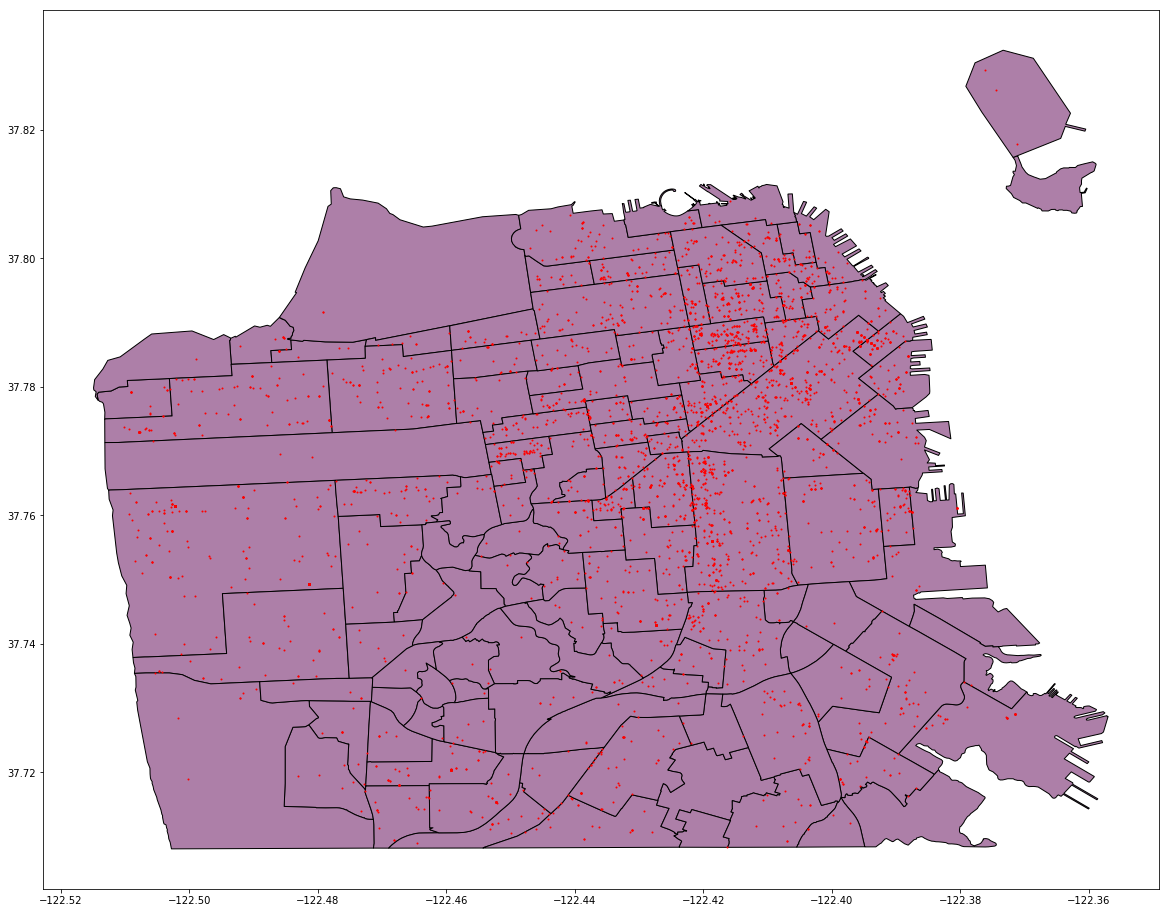

In [333]:
sfplot = sanfran.plot(figsize = (20, 20), edgecolor = "black", color = "#ad7fa8")
noiseplot = noise.plot(ax = sfplot, marker = 'o',color = 'red', markersize =1)
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.name, xy = coords, horizontalalignment = "center")
noise.apply(add_label, axis = 1)
plt.show()

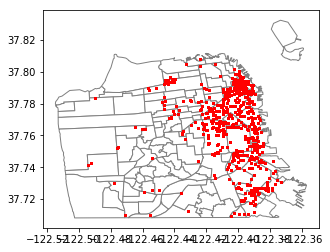

In [125]:
# Make the plot.
ax = sanfran.plot(color = "white", edgecolor = "gray")
food.plot(ax = ax, marker='o', color='red', markersize=1)


# Set x and y limits to adjust the "zoom".
#ax.set_xlim([-122.52, -121.34])
#ax.set_ylim([37.7, 37.84])

In [382]:
#2
print(len(list(counts[counts.num_locations == counts.num_locations.min()].vendor)))
counts[counts.num_locations == counts.num_locations.min()]


43


,vendor,num_locations
1,Sausage Slinger,1
5,French Creme Brulee,1
6,Your Community Foods,1
9,Teresa Hotdogs,1
10,"Mr. Nice, LLC",1
12,Mario's Colombian and Mexican Food,1
18,A Taste of Chicago,1
20,"Wexler, LLC",1
21,The Creme Brulee Cart,1
24,Raspados El Yocateco,1


In [377]:
pd.read_sql("SELECT DISTINCT pdDistrict FROM crime",db)

,PdDistrict
0,MISSION
1,TENDERLOIN
2,NORTHERN
3,RICHMOND
4,BAYVIEW
5,CENTRAL
6,PARK
7,TARAVAL
8,SOUTHERN
9,INGLESIDE


In [127]:
db.close()

In [136]:
pd.read_sql("SELECT DISTINCT LocationDescription FROM mobile_food_locations",db).head()

,LocationDescription
0,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499)
1,MISSOURI ST: 20TH ST to SIERRA ST (500 - 630)
2,17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299)
3,CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...
4,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899)


In [108]:
set(pd.read_sql("SELECT DISTINCT * FROM schools",db).GradeRange)

{'1-4',
 '1-6',
 '1-8',
 '13-14',
 '2-12',
 '3-8',
 '4-8',
 '5-12',
 '5-8',
 '6-12',
 '6-8',
 '7-12',
 '8-12',
 '9-12',
 'INF',
 'K-1',
 'K-12',
 'K-2',
 'K-4',
 'K-5',
 'K-6',
 'K-8',
 'PK',
 'PK-12',
 'PK-4',
 'PK-5',
 'PK-6',
 'PK-8',
 'PK-K',
 'PK-TK',
 'TK-2',
 'TK-8'}